In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [3]:
df = pd.read_csv('../data/1200-1399/game.csv')
df.head()

,Event,Site,White,Black,WhiteElo,BlackElo,TimeControl,Date,ECO,PlyCount,Result,Movements
0,FICS rated standard game,FICS freechess.org,edclaudio,edinei,1370,1345,3600+30,2020.05.12,C41,165,1-0,1. e4 e5 2. Nf3 d6 3. h3 c6 4. Bc4 h6 5. Nc3 N...
1,FICS rated blitz game,FICS freechess.org,grivnash,Gotbe,1243,1232,600+0,2020.05.12,D00,76,0-1,1. d4 d5 2. e3 Nf6 3. c4 e6 4. c5 c6 5. Nc3 b6...
2,FICS rated blitz game,FICS freechess.org,MARYROLL,eklavya,1367,1349,180+0,2020.05.12,B30,86,0-1,1. e4 c5 2. Nf3 Nc6 3. a3 e6 4. Nc3 Qb6 5. d3 ...
3,FICS rated blitz game,FICS freechess.org,salth,LTVT,1245,1388,180+0,2020.05.12,C25,52,0-1,1. e4 e5 2. Nc3 Nc6 3. a3 d6 4. Bc4 Nf6 5. d3 ...
4,FICS rated blitz game,FICS freechess.org,eklavya,MARYROLL,1357,1359,180+0,2020.05.12,B00,76,0-1,1. e4 e5 2. d4 Nc6 3. d5 Nb4 4. a3 Na6 5. Nf3 ...


In [13]:
movements = df['Movements']

In [14]:
movements[0]

'1. e4 e5 2. Nf3 d6 3. h3 c6 4. Bc4 h6 5. Nc3 Nf6 6. d3 Qe7 7. Ne2 Be6 8. Bxe6 Qxe6 9. O-O Nbd7 10. a3 Be7 11. Ng3 g6 12. Be3 d5 13. Qc1 Bf8 14. b4 O-O-O 15. a4 Bxb4 16. Qb2 Qd6 17. Rab1 a5 18. c3 c5 19. cxb4 axb4 20. a5 Kc7 21. Ne2 d4 22. Bc1 Ra8 23. Ra1 Nb8 24. Bd2 Nc6 25. Qb3 Rhf8 26. Qc2 Kd7 27. Qc4 Nxa5 28. Qb5+ Qc6 29. Qxc6+ Nxc6 30. Bxh6 Rg8 31. Bg5 Na5 32. Bxf6 b3 33. Bg5 Rge8 34. Bd2 b2 35. Ra2 c4 36. Rxb2 cxd3 37. Ng3 Nc4 38. Rxb7+ Kc6 39. Rxf7 Red8 40. Rf6+ Rd6 41. Rxd6+ Kxd6 42. Bb4+ Kc6 43. Rc1 Kb5 44. Be7 d2 45. Rd1 Ra2 46. Bg5 Nb2 47. Rxd2 Ra1+ 48. Kh2 Rb1 49. Nxe5 Na4 50. Rxd4 Nc3 51. Rd6 Nd1 52. Nd7 Kc4 53. e5 Nxf2 54. e6 Re1 55. Nf8 Nd3 56. e7 Nc5 57. Rd8 Nb7 58. Rc8+ Kd5 59. e8=Q Rxe8 60. Rd8+ Nxd8 61. Nxg6 Nf7 62. Bd2 Nd6 63. Nh5 Ne4 64. Bc1 Kc4 65. Nhf4 Ng5 66. Ne2 Rxe2 67. Bxg5 Kc3 68. Kg3 Kc2 69. Kf3 Kd1 70. Nf4 Ra2 71. g3 Ra3+ 72. Kg4 Ke1 73. h4 Kf2 74. Nh5 Kg2 75. Bf4 Ra8 76. Nf6 Rf8 77. Kg5 Ra8 78. h5 Ra5+ 79. Kg6 Ra8 80. h6 Rh8 81. h7 Rxh7 82. Kxh7 Kf3 83. Be

In [16]:
# parsing the game movement string
import re

split = re.split('[0-9]+\.', movements[0])
print(split)

['', ' e4 e5 ', ' Nf3 d6 ', ' h3 c6 ', ' Bc4 h6 ', ' Nc3 Nf6 ', ' d3 Qe7 ', ' Ne2 Be6 ', ' Bxe6 Qxe6 ', ' O-O Nbd7 ', ' a3 Be7 ', ' Ng3 g6 ', ' Be3 d5 ', ' Qc1 Bf8 ', ' b4 O-O-O ', ' a4 Bxb4 ', ' Qb2 Qd6 ', ' Rab1 a5 ', ' c3 c5 ', ' cxb4 axb4 ', ' a5 Kc7 ', ' Ne2 d4 ', ' Bc1 Ra8 ', ' Ra1 Nb8 ', ' Bd2 Nc6 ', ' Qb3 Rhf8 ', ' Qc2 Kd7 ', ' Qc4 Nxa5 ', ' Qb5+ Qc6 ', ' Qxc6+ Nxc6 ', ' Bxh6 Rg8 ', ' Bg5 Na5 ', ' Bxf6 b3 ', ' Bg5 Rge8 ', ' Bd2 b2 ', ' Ra2 c4 ', ' Rxb2 cxd3 ', ' Ng3 Nc4 ', ' Rxb7+ Kc6 ', ' Rxf7 Red8 ', ' Rf6+ Rd6 ', ' Rxd6+ Kxd6 ', ' Bb4+ Kc6 ', ' Rc1 Kb5 ', ' Be7 d2 ', ' Rd1 Ra2 ', ' Bg5 Nb2 ', ' Rxd2 Ra1+ ', ' Kh2 Rb1 ', ' Nxe5 Na4 ', ' Rxd4 Nc3 ', ' Rd6 Nd1 ', ' Nd7 Kc4 ', ' e5 Nxf2 ', ' e6 Re1 ', ' Nf8 Nd3 ', ' e7 Nc5 ', ' Rd8 Nb7 ', ' Rc8+ Kd5 ', ' e8=Q Rxe8 ', ' Rd8+ Nxd8 ', ' Nxg6 Nf7 ', ' Bd2 Nd6 ', ' Nh5 Ne4 ', ' Bc1 Kc4 ', ' Nhf4 Ng5 ', ' Ne2 Rxe2 ', ' Bxg5 Kc3 ', ' Kg3 Kc2 ', ' Kf3 Kd1 ', ' Nf4 Ra2 ', ' g3 Ra3+ ', ' Kg4 Ke1 ', ' h4 Kf2 ', ' Nh5 Kg2 ', ' Bf4 Ra8 ', ' 

In [15]:
movements[0][0]

'1'

In [17]:
# applying some transformation
moves = list(map(lambda v: v.strip(), split))
moves = moves[1:-1]
print(moves)

['e4 e5', 'Nf3 d6', 'h3 c6', 'Bc4 h6', 'Nc3 Nf6', 'd3 Qe7', 'Ne2 Be6', 'Bxe6 Qxe6', 'O-O Nbd7', 'a3 Be7', 'Ng3 g6', 'Be3 d5', 'Qc1 Bf8', 'b4 O-O-O', 'a4 Bxb4', 'Qb2 Qd6', 'Rab1 a5', 'c3 c5', 'cxb4 axb4', 'a5 Kc7', 'Ne2 d4', 'Bc1 Ra8', 'Ra1 Nb8', 'Bd2 Nc6', 'Qb3 Rhf8', 'Qc2 Kd7', 'Qc4 Nxa5', 'Qb5+ Qc6', 'Qxc6+ Nxc6', 'Bxh6 Rg8', 'Bg5 Na5', 'Bxf6 b3', 'Bg5 Rge8', 'Bd2 b2', 'Ra2 c4', 'Rxb2 cxd3', 'Ng3 Nc4', 'Rxb7+ Kc6', 'Rxf7 Red8', 'Rf6+ Rd6', 'Rxd6+ Kxd6', 'Bb4+ Kc6', 'Rc1 Kb5', 'Be7 d2', 'Rd1 Ra2', 'Bg5 Nb2', 'Rxd2 Ra1+', 'Kh2 Rb1', 'Nxe5 Na4', 'Rxd4 Nc3', 'Rd6 Nd1', 'Nd7 Kc4', 'e5 Nxf2', 'e6 Re1', 'Nf8 Nd3', 'e7 Nc5', 'Rd8 Nb7', 'Rc8+ Kd5', 'e8=Q Rxe8', 'Rd8+ Nxd8', 'Nxg6 Nf7', 'Bd2 Nd6', 'Nh5 Ne4', 'Bc1 Kc4', 'Nhf4 Ng5', 'Ne2 Rxe2', 'Bxg5 Kc3', 'Kg3 Kc2', 'Kf3 Kd1', 'Nf4 Ra2', 'g3 Ra3+', 'Kg4 Ke1', 'h4 Kf2', 'Nh5 Kg2', 'Bf4 Ra8', 'Nf6 Rf8', 'Kg5 Ra8', 'h5 Ra5+', 'Kg6 Ra8', 'h6 Rh8', 'h7 Rxh7', 'Kxh7 Kf3']


In [18]:
'''
clarifying some notations in the string

K: King
Q: Queen
R: Rook
B: Bishop
N: Knight
P: Pawn (although, by convention, P is usually omitted from notation)

Special Symbols

x: captures
0-0: kingside castle
0-0-0: queenside castle
+: check
#: checkmate
!: good move
?: poor move
more !s and ?s can be added for emphasis.

e4: means a pawn was moved to e4 (no Capital letter means it was a pawn)
Nf3: Knight was moved to f3
Bc4: Bishop moved to c4
Qe7: Queen to e7
Bxe6: Bishop caputred the piece on e6 ("x" refers to capturing a piece)
Rf6+: Rook to f6, this move was a check to the opponent's king
O-O: a king side castling
O-O-O: a queen side castling
e8=Q: pawn to e8, promotion to Queen ("=" refers to pawn promotion followed by the choice of piece)
Qh5#: Queen to h5, a checkmate ("#" refers to a checkmate)
'''

'\nclarifying some notations in the string\n\nK: King\nQ: Queen\nR: Rook\nB: Bishop\nN: Knight\nP: Pawn (although, by convention, P is usually omitted from notation)\n\nSpecial Symbols\n\nx: captures\n0-0: kingside castle\n0-0-0: queenside castle\n+: check\n#: checkmate\n!: good move\n?: poor move\nmore !s and ?s can be added for emphasis.\n\ne4: means a pawn was moved to e4 (no Capital letter means it was a pawn)\nNf3: Knight was moved to f3\nBc4: Bishop moved to c4\nQe7: Queen to e7\nBxe6: Bishop caputred the piece on e6 ("x" refers to capturing a piece)\nRf6+: Rook to f6, this move was a check to the opponent\'s king\nO-O: a king side castling\nO-O-O: a queen side castling\ne8=Q: pawn to e8, promotion to Queen ("=" refers to pawn promotion followed by the choice of piece)\nQh5#: Queen to h5, a checkmate ("#" refers to a checkmate)\n'

In [22]:
white_black_moves = list(map(lambda v: v.split(" "), moves))
print(white_black_moves)

[['e4', 'e5'], ['Nf3', 'd6'], ['h3', 'c6'], ['Bc4', 'h6'], ['Nc3', 'Nf6'], ['d3', 'Qe7'], ['Ne2', 'Be6'], ['Bxe6', 'Qxe6'], ['O-O', 'Nbd7'], ['a3', 'Be7'], ['Ng3', 'g6'], ['Be3', 'd5'], ['Qc1', 'Bf8'], ['b4', 'O-O-O'], ['a4', 'Bxb4'], ['Qb2', 'Qd6'], ['Rab1', 'a5'], ['c3', 'c5'], ['cxb4', 'axb4'], ['a5', 'Kc7'], ['Ne2', 'd4'], ['Bc1', 'Ra8'], ['Ra1', 'Nb8'], ['Bd2', 'Nc6'], ['Qb3', 'Rhf8'], ['Qc2', 'Kd7'], ['Qc4', 'Nxa5'], ['Qb5+', 'Qc6'], ['Qxc6+', 'Nxc6'], ['Bxh6', 'Rg8'], ['Bg5', 'Na5'], ['Bxf6', 'b3'], ['Bg5', 'Rge8'], ['Bd2', 'b2'], ['Ra2', 'c4'], ['Rxb2', 'cxd3'], ['Ng3', 'Nc4'], ['Rxb7+', 'Kc6'], ['Rxf7', 'Red8'], ['Rf6+', 'Rd6'], ['Rxd6+', 'Kxd6'], ['Bb4+', 'Kc6'], ['Rc1', 'Kb5'], ['Be7', 'd2'], ['Rd1', 'Ra2'], ['Bg5', 'Nb2'], ['Rxd2', 'Ra1+'], ['Kh2', 'Rb1'], ['Nxe5', 'Na4'], ['Rxd4', 'Nc3'], ['Rd6', 'Nd1'], ['Nd7', 'Kc4'], ['e5', 'Nxf2'], ['e6', 'Re1'], ['Nf8', 'Nd3'], ['e7', 'Nc5'], ['Rd8', 'Nb7'], ['Rc8+', 'Kd5'], ['e8=Q', 'Rxe8'], ['Rd8+', 'Nxd8'], ['Nxg6', 'Nf7'], ['Bd2',

In [23]:
white_moves = [move[0] for move in white_black_moves]
black_moves = [move[1] for move in white_black_moves]

In [35]:
def parse_movement_to_player_moves(movement_string, side):
    # split the game into individual turns
    split = re.split('[0-9]+\.', movement_string)
    # strip white spaces and the last move
    moves = list(map(lambda v: v.strip(), split))
    last_move = moves[-1]
    moves = moves[1:-1]
    white_black_moves = list(map(lambda v: v.split(" "), moves))
    if side == 'White':
        return [move[0] for move in white_black_moves]
    else:
        return [move[0] for move in white_black_moves]

In [38]:
df['WhiteMoves'] = df['Movements'].transform(parse_movement_to_player_moves, side='White')
df['BlackMoves'] = df['Movements'].transform(parse_movement_to_player_moves, side='Black')

In [39]:
df.head()

,Event,Site,White,Black,WhiteElo,BlackElo,TimeControl,Date,ECO,PlyCount,Result,Movements,WhiteMoves,BlackMoves
0,FICS rated standard game,FICS freechess.org,edclaudio,edinei,1370,1345,3600+30,2020.05.12,C41,165,1-0,1. e4 e5 2. Nf3 d6 3. h3 c6 4. Bc4 h6 5. Nc3 N...,"[e4, Nf3, h3, Bc4, Nc3, d3, Ne2, Bxe6, O-O, a3...","[e4, Nf3, h3, Bc4, Nc3, d3, Ne2, Bxe6, O-O, a3..."
1,FICS rated blitz game,FICS freechess.org,grivnash,Gotbe,1243,1232,600+0,2020.05.12,D00,76,0-1,1. d4 d5 2. e3 Nf6 3. c4 e6 4. c5 c6 5. Nc3 b6...,"[d4, e3, c4, c5, Nc3, b4, Nf3, Nxb5, Nd6+, cxd...","[d4, e3, c4, c5, Nc3, b4, Nf3, Nxb5, Nd6+, cxd..."
2,FICS rated blitz game,FICS freechess.org,MARYROLL,eklavya,1367,1349,180+0,2020.05.12,B30,86,0-1,1. e4 c5 2. Nf3 Nc6 3. a3 e6 4. Nc3 Qb6 5. d3 ...,"[e4, Nf3, a3, Nc3, d3, Be2, O-O, e5, h3, Nxe5,...","[e4, Nf3, a3, Nc3, d3, Be2, O-O, e5, h3, Nxe5,..."
3,FICS rated blitz game,FICS freechess.org,salth,LTVT,1245,1388,180+0,2020.05.12,C25,52,0-1,1. e4 e5 2. Nc3 Nc6 3. a3 d6 4. Bc4 Nf6 5. d3 ...,"[e4, Nc3, a3, Bc4, d3, Nge2, O-O, f4, Nxf4, Be...","[e4, Nc3, a3, Bc4, d3, Nge2, O-O, f4, Nxf4, Be..."
4,FICS rated blitz game,FICS freechess.org,eklavya,MARYROLL,1357,1359,180+0,2020.05.12,B00,76,0-1,1. e4 e5 2. d4 Nc6 3. d5 Nb4 4. a3 Na6 5. Nf3 ...,"[e4, d4, d5, a3, Nf3, Nc3, Be2, Bxf3, O-O, Re1...","[e4, d4, d5, a3, Nf3, Nc3, Be2, Bxf3, O-O, Re1..."


In [47]:
def getNumberOfPieceMoves(moves, piece):
    count = 0
    for move in moves:
        if piece == 'P':
            if move[0].islower():
                count += 1
        else:
            if move[0] == piece:
                count += 1
    return count

In [49]:
df['PawnMoveCount_White'] = df['WhiteMoves'].transform(getNumberOfPieceMoves, piece='P')
df['KnightMoveCount_White'] = df['WhiteMoves'].transform(getNumberOfPieceMoves, piece='N')
df['BishopMoveCount_White'] = df['WhiteMoves'].transform(getNumberOfPieceMoves, piece='B')
df['RookMoveCount_White'] = df['WhiteMoves'].transform(getNumberOfPieceMoves, piece='R')
df['QueenMoveCount_White'] = df['WhiteMoves'].transform(getNumberOfPieceMoves, piece='Q')
df['KingMoveCount_White'] = df['WhiteMoves'].transform(getNumberOfPieceMoves, piece='K')

In [50]:
df.head()

,Event,Site,White,Black,WhiteElo,BlackElo,TimeControl,Date,ECO,PlyCount,Result,Movements,WhiteMoves,BlackMoves,PawnMoveCount_White,KnightMoveCount_White,BishopMoveCount_White,RookMoveCount_White,QueenMoveCount_White,KingMoveCount_White
0,FICS rated standard game,FICS freechess.org,edclaudio,edinei,1370,1345,3600+30,2020.05.12,C41,165,1-0,1. e4 e5 2. Nf3 d6 3. h3 c6 4. Bc4 h6 5. Nc3 N...,"[e4, Nf3, h3, Bc4, Nc3, d3, Ne2, Bxe6, O-O, a3...","[e4, Nf3, h3, Bc4, Nc3, d3, Ne2, Bxe6, O-O, a3...",18,16,17,16,7,7
1,FICS rated blitz game,FICS freechess.org,grivnash,Gotbe,1243,1232,600+0,2020.05.12,D00,76,0-1,1. d4 d5 2. e3 Nf6 3. c4 e6 4. c5 c6 5. Nc3 b6...,"[d4, e3, c4, c5, Nc3, b4, Nf3, Nxb5, Nd6+, cxd...","[d4, e3, c4, c5, Nc3, b4, Nf3, Nxb5, Nd6+, cxd...",11,9,5,4,5,2
2,FICS rated blitz game,FICS freechess.org,MARYROLL,eklavya,1367,1349,180+0,2020.05.12,B30,86,0-1,1. e4 c5 2. Nf3 Nc6 3. a3 e6 4. Nc3 Qb6 5. d3 ...,"[e4, Nf3, a3, Nc3, d3, Be2, O-O, e5, h3, Nxe5,...","[e4, Nf3, a3, Nc3, d3, Be2, O-O, e5, h3, Nxe5,...",10,8,7,1,13,2
3,FICS rated blitz game,FICS freechess.org,salth,LTVT,1245,1388,180+0,2020.05.12,C25,52,0-1,1. e4 e5 2. Nc3 Nc6 3. a3 d6 4. Bc4 Nf6 5. d3 ...,"[e4, Nc3, a3, Bc4, d3, Nge2, O-O, f4, Nxf4, Be...","[e4, Nc3, a3, Bc4, d3, Nge2, O-O, f4, Nxf4, Be...",5,6,7,1,5,0
4,FICS rated blitz game,FICS freechess.org,eklavya,MARYROLL,1357,1359,180+0,2020.05.12,B00,76,0-1,1. e4 e5 2. d4 Nc6 3. d5 Nb4 4. a3 Na6 5. Nf3 ...,"[e4, d4, d5, a3, Nf3, Nc3, Be2, Bxf3, O-O, Re1...","[e4, d4, d5, a3, Nf3, Nc3, Be2, Bxf3, O-O, Re1...",14,9,7,4,2,0


In [51]:
df.describe()

,WhiteElo,BlackElo,PlyCount,PawnMoveCount_White,KnightMoveCount_White,BishopMoveCount_White,RookMoveCount_White,QueenMoveCount_White,KingMoveCount_White
count,4972.000000,4972.000000,4972.000000,4972.000000,4972.000000,4972.000000,4972.000000,4972.000000,4972.000000
mean,1312.182019,1312.518906,69.606798,9.587490,6.118665,5.315768,4.879324,4.161102,3.162711
std,54.728088,54.516568,31.195293,4.182012,3.620556,2.937156,5.152270,3.683789,5.077856
min,1200.000000,1200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1268.000000,1269.000000,48.000000,7.000000,4.000000,3.000000,1.000000,2.000000,0.000000
50%,1317.000000,1318.000000,66.000000,9.000000,5.000000,5.000000,4.000000,3.000000,1.000000
75%,1360.000000,1359.000000,88.000000,12.000000,8.000000,7.000000,7.000000,6.000000,4.000000
max,1399.000000,1399.000000,259.000000,27.000000,61.000000,25.000000,48.000000,45.000000,56.000000


In [60]:
'''
however, since there may be longer games compared to shorter games (and higher tier players may tend to have longer games because both players are skilled, so instead of counting the movements, it would be more beneficial to
standardize the values into ratios). i.e. how often does the user move a Knight piece?
'''
print('play count:', df.iloc[3].PlyCount)
print('moves:', df.iloc[3].Movements)

play count: 52
moves: 1. e4 e5 2. Nc3 Nc6 3. a3 d6 4. Bc4 Nf6 5. d3 Nd4 6. Nge2 Be7 7. O-O O-O 8. f4 exf4 9. Nxf4 c5 10. Be3 Bg4 11. Qd2 a6 12. h3 Bh5 13. Nxh5 Nxh5 14. Bxd4 cxd4 15. Ne2 Bf6 16. Qe1 Be5 17. Qf2 Qg5 18. Bxf7+ Kh8 19. Qe1 Nf6 20. Bb3 b5 21. Rf3 Rac8 22. Ng3 a5 23. Qf2 a4 24. Ba2 b4 25. Bc4 b3 26. cxb3 axb3 {White forfeits on time} 0-1


In [63]:
'''
as you can see, the PlyCount counts turns individually (so white move then black move = 2 PlyCount)
I think it's fine to just divide that by 2 to get 'TurnCount'.
'''
df['TurnCount'] = df['PlyCount']/2

In [64]:
df['PawnMovePercentage_White'] = df['PawnMoveCount_White'] / df['TurnCount']
df['KnightMovePercentage_White'] = df['KnightMoveCount_White'] / df['TurnCount']
df['BishopMovePercentage_White'] = df['BishopMoveCount_White'] / df['TurnCount']
df['RookMovePercentage_White'] = df['RookMoveCount_White'] / df['TurnCount']
df['QueenMovePercentage_White'] = df['QueenMoveCount_White'] / df['TurnCount']
df['KingMovePercentage_White'] = df['KingMoveCount_White'] / df['TurnCount']

In [65]:
df.describe()

,WhiteElo,BlackElo,PlyCount,PawnMoveCount_White,KnightMoveCount_White,BishopMoveCount_White,RookMoveCount_White,QueenMoveCount_White,KingMoveCount_White,TurnCount,PawnMovePercentage_White,KnightMovePercentage_White,BishopMovePercentage_White,RookMovePercentage_White,QueenMovePercentage_White,KingMovePercentage_White
count,4972.000000,4972.000000,4972.000000,4972.000000,4972.000000,4972.000000,4972.000000,4972.000000,4972.000000,4972.000000,4972.000000,4972.000000,4972.000000,4972.000000,4972.000000,4972.000000
mean,1312.182019,1312.518906,69.606798,9.587490,6.118665,5.315768,4.879324,4.161102,3.162711,34.803399,0.289279,0.186107,0.160976,0.117337,0.118622,0.066687
std,54.728088,54.516568,31.195293,4.182012,3.620556,2.937156,5.152270,3.683789,5.077856,15.597647,0.091512,0.087233,0.074760,0.092490,0.087429,0.084212
min,1200.000000,1200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1268.000000,1269.000000,48.000000,7.000000,4.000000,3.000000,1.000000,2.000000,0.000000,24.000000,0.228571,0.123077,0.107143,0.047619,0.052632,0.000000
50%,1317.000000,1318.000000,66.000000,9.000000,5.000000,5.000000,4.000000,3.000000,1.000000,33.000000,0.281250,0.177215,0.153846,0.103896,0.103448,0.035714
75%,1360.000000,1359.000000,88.000000,12.000000,8.000000,7.000000,7.000000,6.000000,4.000000,44.000000,0.338983,0.239177,0.206897,0.171429,0.170343,0.102564
max,1399.000000,1399.000000,259.000000,27.000000,61.000000,25.000000,48.000000,45.000000,56.000000,129.500000,0.888889,0.600000,0.571429,0.542056,0.634146,0.615385


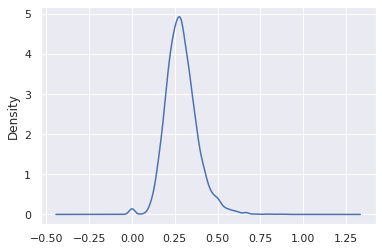

In [68]:
# checking the distribution pawn movement ratio
df['PawnMovePercentage_White'].plot.kde()

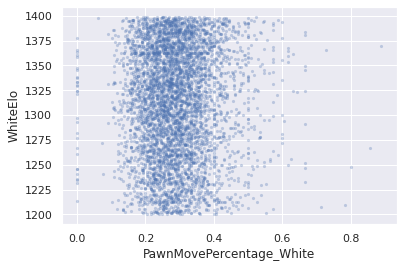

In [70]:
sns.scatterplot(
    x=df['PawnMovePercentage_White'],
    y=df['WhiteElo'],
    alpha=0.3,
    s=10,
    linewidth=0
)

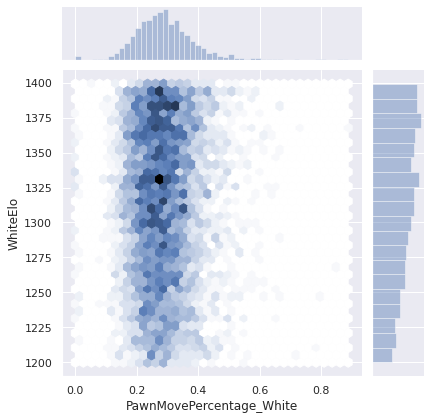

In [71]:
sns.jointplot(
    x=df['PawnMovePercentage_White'],
    y=df['WhiteElo'],
    kind='hex'
)

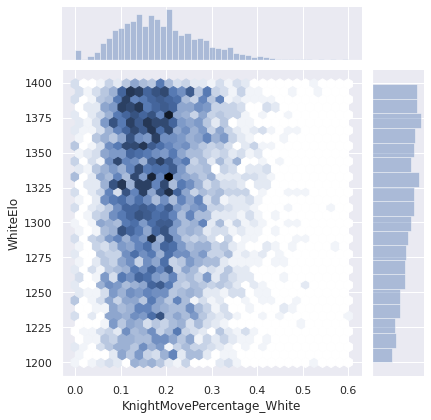

In [72]:
sns.jointplot(
    x=df['KnightMovePercentage_White'],
    y=df['WhiteElo'],
    kind='hex'
)

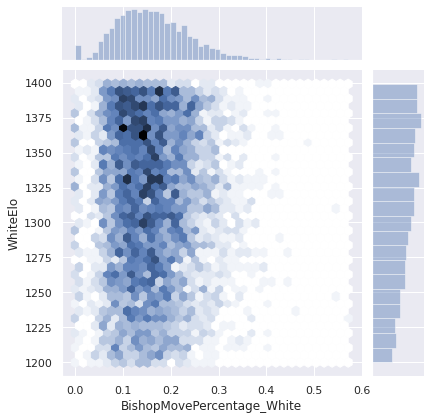

In [73]:
sns.jointplot(
    x=df['BishopMovePercentage_White'],
    y=df['WhiteElo'],
    kind='hex'
)

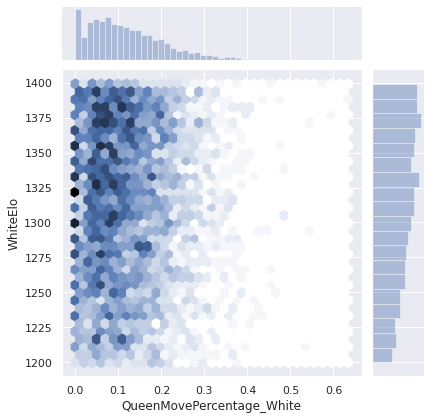

In [74]:
sns.jointplot(
    x=df['QueenMovePercentage_White'],
    y=df['WhiteElo'],
    kind='hex'
)

In [77]:
# let's look at the castling turn
def getCastlingTurn(moves):
    turn = None
    # look for either king side castle or queen side castle
    for index, move in enumerate(moves):
        if move == 'O-O':
            turn = index
        if move == 'O-O-O':
            turn = index
    return turn

In [93]:
df['CastlingTurn_White'] = df['WhiteMoves'].transform(getCastlingTurn)
df['CastlingTurn_Black'] = df['BlackMoves'].transform(getCastlingTurn)

In [83]:
df['CastlingTurn_White'].value_counts()

7.0     514
6.0     501
8.0     456
5.0     364
9.0     361
10.0    307
4.0     255
11.0    246
12.0    206
13.0    194
14.0    141
3.0     121
15.0    112
16.0     78
17.0     74
18.0     47
19.0     46
20.0     37
21.0     23
23.0     19
22.0     18
24.0      9
25.0      7
27.0      5
26.0      4
33.0      3
28.0      2
30.0      1
31.0      1
32.0      1
29.0      1
Name: CastlingTurn_White, dtype: int64

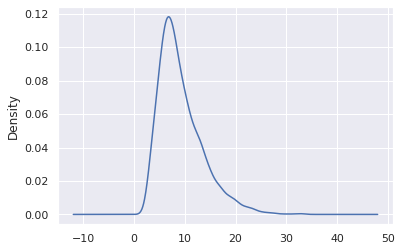

In [89]:
df['CastlingTurn_White'].plot.kde()

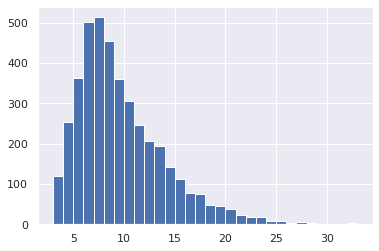

In [92]:
df['CastlingTurn_White'].hist(bins=30)

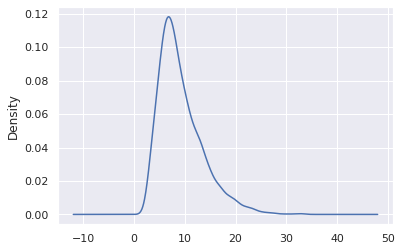

In [94]:
df['CastlingTurn_Black'].plot.kde()

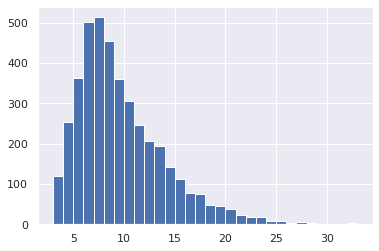

In [95]:
df['CastlingTurn_Black'].hist(bins=30)